In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
sim1 = pd.read_csv("https://raw.githubusercontent.com/christlc/ml4bpython/master/sim1.csv")

In [3]:
sim1.head()

,x,y
0,1,4.199913
1,1,7.510634
2,1,2.125473
3,2,8.988857
4,2,10.243105


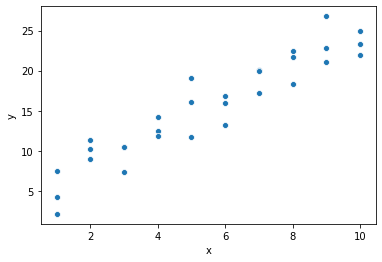

In [4]:
# Lets look at the scatterplot of the data
sns.scatterplot(x='x', y='y', data=sim1)

In [15]:
# fit a linear regression model with stats model
result = smf.ols('y ~ x', data=sim1).fit()

In [ ]:
result.summary()

In [18]:
prediction = result.predict(sim1)
prediction

0      6.272355
1      6.272355
2      6.272355
3      8.323888
4      8.323888
5      8.323888
6     10.375421
7     10.375421
8     10.375421
9     12.426954
10    12.426954
11    12.426954
12    14.478487
13    14.478487
14    14.478487
15    16.530020
16    16.530020
17    16.530020
18    18.581553
19    18.581553
20    18.581553
21    20.633087
22    20.633087
23    20.633087
24    22.684620
25    22.684620
26    22.684620
27    24.736153
28    24.736153
29    24.736153
dtype: float64

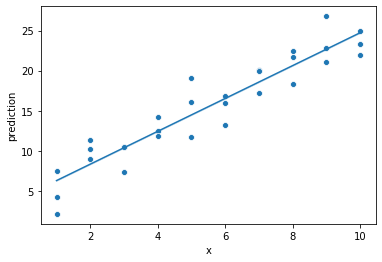

In [25]:
df = pd.DataFrame({
    'x': sim1['x'],
    'prediction': result.predict(sim1)
})
sns.scatterplot(x='x', y='y', data=sim1)
sns.lineplot(x='x',y='prediction', data=df)

# Another Example

In [6]:
my_data = pd.read_csv("https://raw.githubusercontent.com/christlc/ml4bpython/master/my_data.csv")
my_data.head()

,x,y
0,2.084619,10.343196
1,5.672026,124.672637
2,4.310196,89.589539
3,4.990277,175.206434
4,0.294362,0.036849


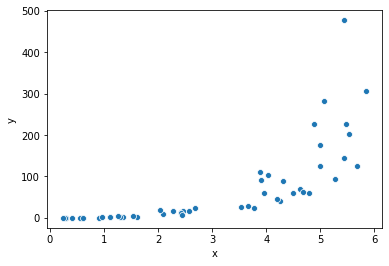

In [7]:
sns.scatterplot(x='x', y='y', data=my_data)

In [31]:
result = smf.ols('y ~ x', data=my_data).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     56.47
Date:                Sun, 26 May 2019   Prob (F-statistic):           1.20e-09
Time:                        10:42:12   Log-Likelihood:                -280.18
No. Observations:                  50   AIC:                             564.4
Df Residuals:                      48   BIC:                             568.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -53.0745     18.729     -2.834      0.007     -90.732     -15.417
x             39.8594      5.304      7.514      0.000      29.194      50.525
==============================================================================
Omnibus:                       44.690   Durbin-Watson:                   2.137
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              189.542
Skew:                           2.306   Prob(JB):                     6.94e-42
Kurtosis:                      11.350   Cond. No.                         7.40
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

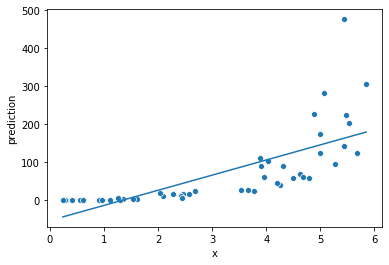

In [32]:
df = pd.DataFrame({
    'x': my_data['x'],
    'prediction': result.predict(my_data)
})
sns.scatterplot(x='x', y='y', data=my_data)
sns.lineplot(x='x',y='prediction', data=df)

In [38]:
result = smf.ols('y ~ x + I(x**2)', data=my_data).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     48.20
Date:                Sun, 26 May 2019   Prob (F-statistic):           4.12e-12
Time:                        10:49:41   Log-Likelihood:                -271.73
No. Observations:                  50   AIC:                             549.5
Df Residuals:                      47   BIC:                             555.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.7958     24.704      1.166      0.250     -20.903      78.494
x            -46.2471     20.321     -2.276      0.027     -87.127      -5.367
I(x ** 2)     14.4665      3.328      4.347      0.000       7.771      21.162
==============================================================================
Omnibus:                       45.394   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              241.270
Skew:                           2.204   Prob(JB):                     4.06e-53
Kurtosis:                      12.817   Cond. No.                         65.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

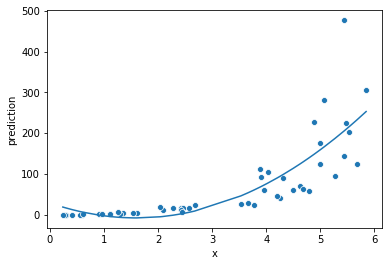

In [36]:
df = pd.DataFrame({
    'x': my_data['x'],
    'prediction': result.predict(my_data)
})
sns.scatterplot(x='x', y='y', data=my_data)
sns.lineplot(x='x',y='prediction', data=df) # looks better

In [ ]:
# Secondary school maths
# y = a * x^b
# log(y) = log( a * x^b)
#        = log(a) + b * log(x)
# log(y) = log(a) + b * log(x)

In [39]:
my_data['logy'] = np.log(my_data['y'])
my_data['logx'] = np.log(my_data['x'])

In [40]:
result = smf.ols('logy ~ logx', data=my_data).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   logy   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     1380.
Date:                Sun, 26 May 2019   Prob (F-statistic):           5.07e-37
Time:                        10:49:48   Log-Likelihood:                -35.811
No. Observations:                  50   AIC:                             75.62
Df Residuals:                      48   BIC:                             79.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0147      0.098      0.150      0.881      -0.182       0.212
logx           3.0088      0.081     37.144      0.000       2.846       3.172
==============================================================================
Omnibus:                        0.280   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.869   Jarque-Bera (JB):                0.468
Skew:                          -0.041   Prob(JB):                        0.791
Kurtosis:                       2.533   Cond. No.                         2.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

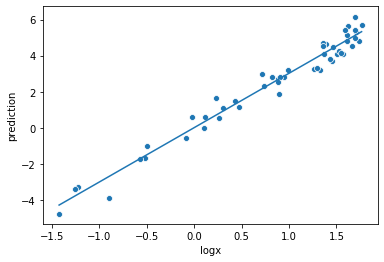

In [41]:
df = pd.DataFrame({
    'logx': my_data['logx'],
    'prediction': result.predict(my_data)
})
sns.scatterplot(x='logx', y='logy', data=my_data)
sns.lineplot(x='logx',y='prediction', data=df) 

# Categorical Variable

In [46]:
sim2 = pd.read_csv("https://raw.githubusercontent.com/christlc/ml4bpython/master/sim2.csv")
sim2.head()

,x,y
0,a,1.935363
1,a,1.176489
2,a,1.243685
3,a,2.623549
4,a,1.112038


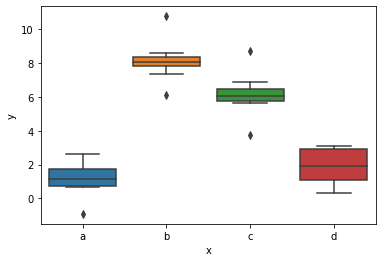

In [44]:
sns.boxplot(x="x", y="y",data=sim2)

In [45]:
result = smf.ols('y ~ x', data=sim2).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     92.52
Date:                Sun, 26 May 2019   Prob (F-statistic):           5.54e-17
Time:                        10:50:51   Log-Likelihood:                -58.421
No. Observations:                  40   AIC:                             124.8
Df Residuals:                      36   BIC:                             131.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1522      0.347      3.316      0.002       0.447       1.857
x[T.b]         6.9639      0.491     14.171      0.000       5.967       7.961
x[T.c]         4.9750      0.491     10.124      0.000       3.978       5.972
x[T.d]         0.7588      0.491      1.544      0.131      -0.238       1.755
==============================================================================
Omnibus:                        2.277   Durbin-Watson:                   2.381
Prob(Omnibus):                  0.320   Jarque-Bera (JB):                1.295
Skew:                           0.154   Prob(JB):                        0.523
Kurtosis:                       3.826   Cond. No.                         4.79
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
df_prediction = pd.DataFrame({'x': ['a', 'b', 'c', 'd']})

In [53]:
df_prediction['prediction'] = result.predict(df_prediction)

In [56]:
df_prediction

,x,prediction
0,a,1.152166
1,b,8.116039
2,c,6.127191
3,d,1.910981


In [58]:
sim2.groupby('x')['y'].mean()

x
a    1.152166
b    8.116039
c    6.127191
d    1.910981
Name: y, dtype: float64

# Example

In [59]:
diamonds = pd.read_csv("https://raw.githubusercontent.com/christlc/ml4bpython/master/diamonds.csv")

In [60]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


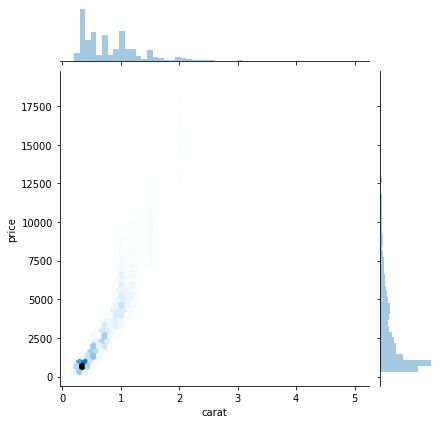

In [64]:
sns.jointplot(x=diamonds['carat'], y=diamonds['price'], kind="hex")

In [62]:
diamonds['lcarat'] = np.log(diamonds['carat'])
diamonds['lprice'] = np.log(diamonds['price'])

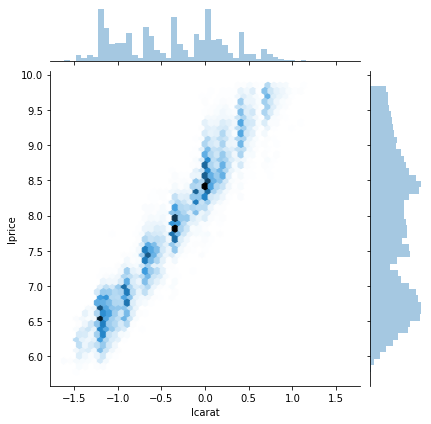

In [63]:
sns.jointplot(x=diamonds['lcarat'], y=diamonds['lprice'], kind="hex")

In [72]:
# Lets fit a price prediction model with lprice ~ lcaret
result = smf.ols('lprice ~ lcarat', data=diamonds).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lprice   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                 7.510e+05
Date:                Sun, 26 May 2019   Prob (F-statistic):               0.00
Time:                        11:11:43   Log-Likelihood:                -4424.2
No. Observations:               53940   AIC:                             8852.
Df Residuals:                   53938   BIC:                             8870.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.4487      0.001   6190.896      0.000       8.446       8.451
lcarat         1.6758      0.002    866.590      0.000       1.672       1.680
==============================================================================
Omnibus:                      877.676   Durbin-Watson:                   1.227
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1679.882
Skew:                           0.072   Prob(JB):                         0.00
Kurtosis:                       3.853   Cond. No.                         2.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

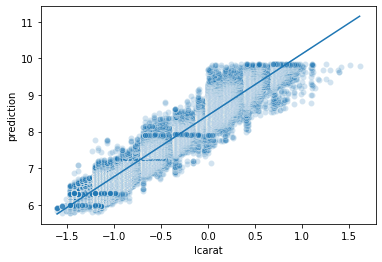

In [71]:
df = pd.DataFrame({
    'lcarat': diamonds['lcarat'],
    'prediction': result.predict(diamonds)
})
sns.scatterplot(x='lcarat', y='lprice', data=diamonds, alpha=0.2)
sns.lineplot(x='lcarat',y='prediction', data=df) 

In [73]:
# Exercise - try add more varaibles to the regression

In [74]:
result = smf.ols('lcarat ~ ? + ?', data=diamonds).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lprice   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                 7.510e+05
Date:                Sun, 26 May 2019   Prob (F-statistic):               0.00
Time:                        11:24:47   Log-Likelihood:                -4424.2
No. Observations:               53940   AIC:                             8852.
Df Residuals:                   53938   BIC:                             8870.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.4487      0.001   6190.896      0.000       8.446       8.451
lcarat         1.6758      0.002    866.590      0.000       1.672       1.680
==============================================================================
Omnibus:                      877.676   Durbin-Watson:                   1.227
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1679.882
Skew:                           0.072   Prob(JB):                         0.00
Kurtosis:                       3.853   Cond. No.                         2.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Overfit

In [107]:
result1 = smf.ols('y ~ x', data=sim1).fit()
sum(result1.resid**2) # sum of squares

135.87459796151566

In [108]:
result2 = smf.ols('y ~ x + np.power(x,2)', data=sim1).fit()
sum(result2.resid**2) # sum of squares

131.17464315066087

In [109]:
result3 = smf.ols('y ~ x + np.power(x,2) + np.power(x, 3)', data=sim1).fit()
sum(result3.resid**2) # sum of squares

131.10219036219064

In [110]:
result4 = smf.ols('y ~ x + np.power(x,2) + np.power(x, 3) + np.power(x, 4) + np.power(x, 5)  + np.power(x, 6)', data=sim1).fit()
sum(result4.resid**2) # sum of squares

113.31961460866931

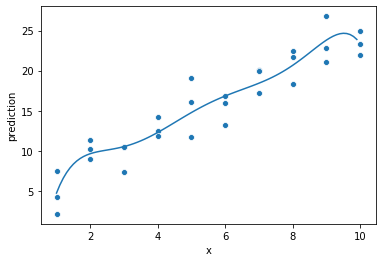

In [111]:
df = pd.DataFrame({
    'x': np.arange(start=1, stop=10, step=0.1)
})
df['prediction'] = result4.predict(df)
sns.scatterplot(x='x', y='y', data=sim1)
sns.lineplot(x='x',y='prediction', data=df)

In [112]:
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     214.7
Date:                Sun, 26 May 2019   Prob (F-statistic):           1.17e-14
Time:                        11:41:28   Log-Likelihood:                -65.226
No. Observations:                  30   AIC:                             134.5
Df Residuals:                      28   BIC:                             137.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.2208      0.869      4.858      0.000       2.441       6.001
x              2.0515      0.140     14.651      0.000       1.765       2.338
==============================================================================
Omnibus:                        0.125   Durbin-Watson:                   2.254
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.333
Skew:                           0.081   Prob(JB):                        0.847
Kurtosis:                       2.510   Cond. No.                         13.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [113]:
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     36.00
Date:                Sun, 26 May 2019   Prob (F-statistic):           1.43e-10
Time:                        11:41:47   Log-Likelihood:                -62.503
No. Observations:                  30   AIC:                             139.0
Df Residuals:                      23   BIC:                             148.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -20.3079     16.264     -1.249      0.224     -53.953      13.337
x                 44.7854     30.531      1.467      0.156     -18.373     107.944
np.power(x, 2)   -26.5269     20.098     -1.320      0.200     -68.102      15.049
np.power(x, 3)     7.8852      6.205      1.271      0.217      -4.952      20.722
np.power(x, 4)    -1.2127      0.976     -1.243      0.226      -3.231       0.806
np.power(x, 5)     0.0929      0.076      1.229      0.231      -0.063       0.249
np.power(x, 6)    -0.0028      0.002     -1.226      0.233      -0.008       0.002
==============================================================================
Omnibus:                        0.232   Durbin-Watson:                   2.515
Prob(Omnibus):                  0.890   Jarque-Bera (JB):                0.432
Skew:                           0.018   Prob(JB):                        0.806
Kurtosis:                       2.414   Cond. No.                     3.70e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.7e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# "Black Box" Regression Model

In [114]:
import sklearn

In [154]:
from sklearn.linear_model import LinearRegression, ElasticNetCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

In [155]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,lcarat,lprice
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,-1.469676,5.786897
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,-1.560648,5.786897
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,-1.469676,5.789960
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,-1.237874,5.811141
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,-1.171183,5.814131


In [156]:
# Adding Categorical Variables

In [157]:
diamonds['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [123]:
pd.get_dummies(diamonds['cut'], drop_first=True).head()

,Good,Ideal,Premium,Very Good
0,0,1,0,0
1,0,0,1,0
2,1,0,0,0
3,0,0,1,0
4,1,0,0,0


In [124]:
diamonds_encoded = pd.get_dummies(diamonds, drop_first=True, dtype=np.float64)

In [126]:
diamonds_encoded.head()

,carat,depth,table,price,x,y,z,lcarat,lprice,cut_Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,-1.469676,5.786897,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,-1.560648,5.786897,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,-1.469676,5.789960,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,-1.237874,5.811141,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,-1.171183,5.814131,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [136]:
y = diamonds_encoded['lprice']
X = diamonds_encoded.drop(['lprice', 'price'],axis=1) # all columns except these twos

In [170]:
model1 = RandomForestRegressor(n_estimators=100)

In [171]:
# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
cross_val_score(model1, X, y, cv=5, scoring='neg_mean_squared_error').mean()

-0.07828547727088528

In [165]:
model2 = LinearRegression()
cross_val_score(model2, X, y, cv=5, scoring='neg_mean_squared_error').mean()

-0.01951157305310447